# Name: 
Faith Jeptoo
# Title: 
EDA
# Date: 
5 October, 2025
# CyberShujaa ID: 
CS-DA02-25005
# Topic: 
Titanic Dataset

# 1. Introduction

This assignment focuses on performing Exploratory Data Analysis (EDA) on the famous Titanic dataset from Kaggle.
The goal is to gain hands-on experience in exploring, cleaning, and visualizing data to uncover meaningful patterns and insights.

EDA involves:

* Understanding the structure and quality of the data

* Handling missing values and outliers

* Performing univariate, bivariate, and multivariate analyses

* Exploring the target variable (Survived) to identify influencing factors

# 2. Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd                  #data manipilation and analysis
import numpy as np                  #numerical operations
import matplotlib.pyplot as plt      #visualization
import seaborn as sns                #advanced plots
sns.set(style="whitegrid")

In [2]:
#Load Titanic Dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")
#Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Initial Data Exploration

In [3]:
#Shapes of the Dataset (rows,columns)
print("Dataset Shape:", df.shape)
#Column names
print("\columns:\n", df.columns)

Dataset Shape: (891, 12)
\columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#Info: data types + non-null values
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#summary statistics for numeric and categorical colums
df.describe(include="all")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 4. Checking for Missing Values and Duplicates

In [6]:
#Missing values and outliers
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

/tmp/ipykernel_13/537847232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_13/537847232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


# 5. Univariate Analysis
Age Distribution

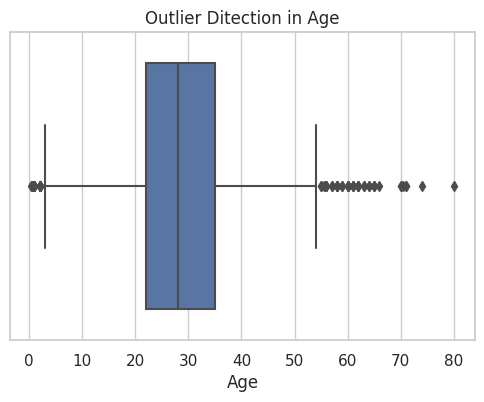

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Outlier Ditection in Age")
plt.show()

Fare Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


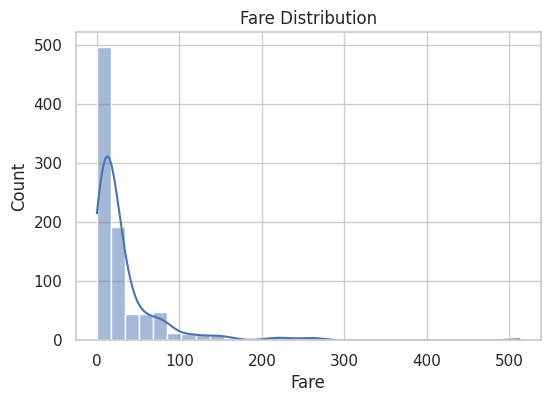

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

Passenger Class, Gender, and Embarked

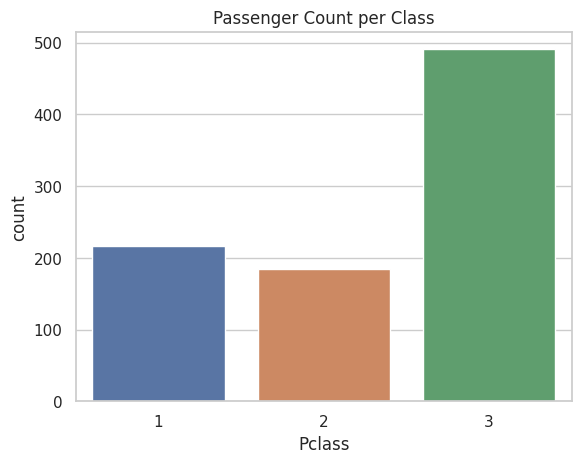

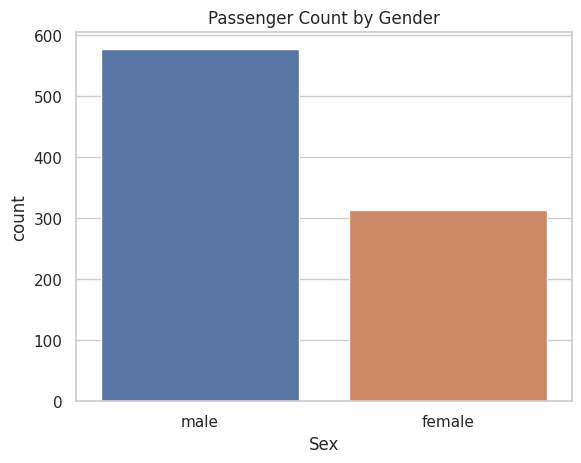

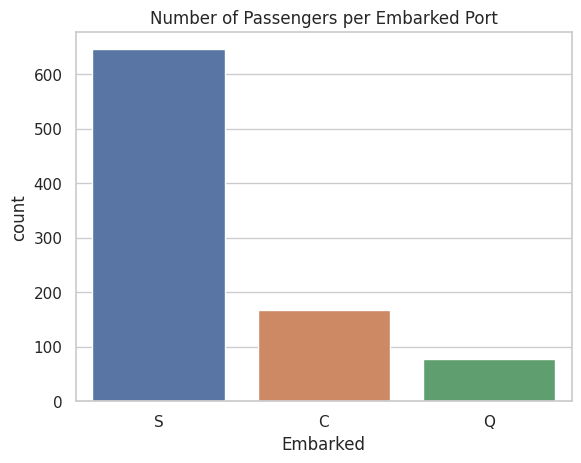

In [11]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Count per Class")
plt.show()

sns.countplot(x='Sex', data=df)
plt.title("Passenger Count by Gender")
plt.show()

sns.countplot(x='Embarked', data=df)
plt.title("Number of Passengers per Embarked Port")
plt.show()

# 6. Bivariate Analysis
Fare vs Pclass

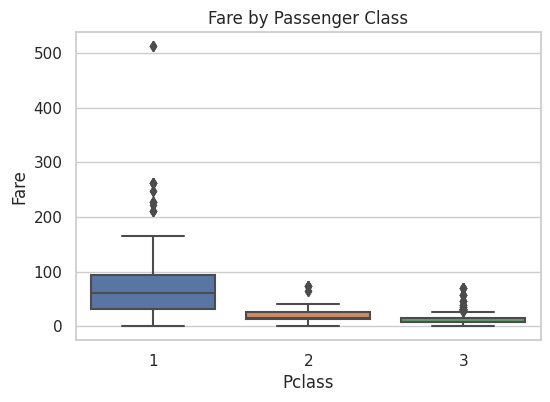

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()

Survival by Gender and Embarked

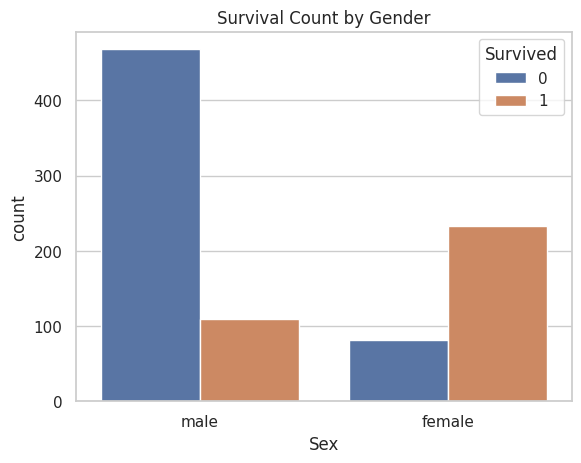

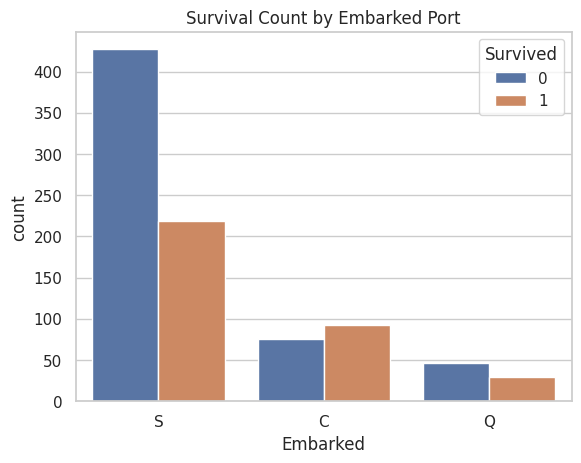

In [13]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival Count by Embarked Port")
plt.show()

Age and Survival

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


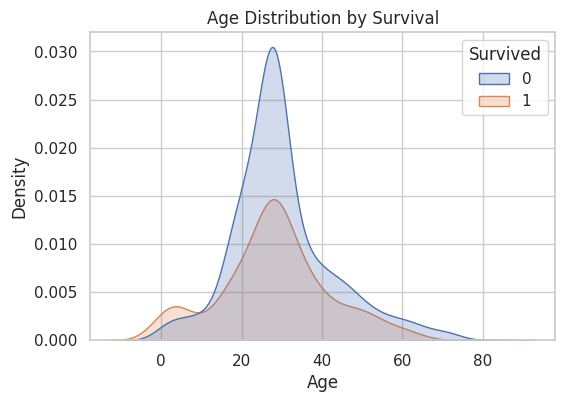

In [14]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title("Age Distribution by Survival")
plt.show()

# 7. Multivariate Analysis
Class, Gender, and Survival

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


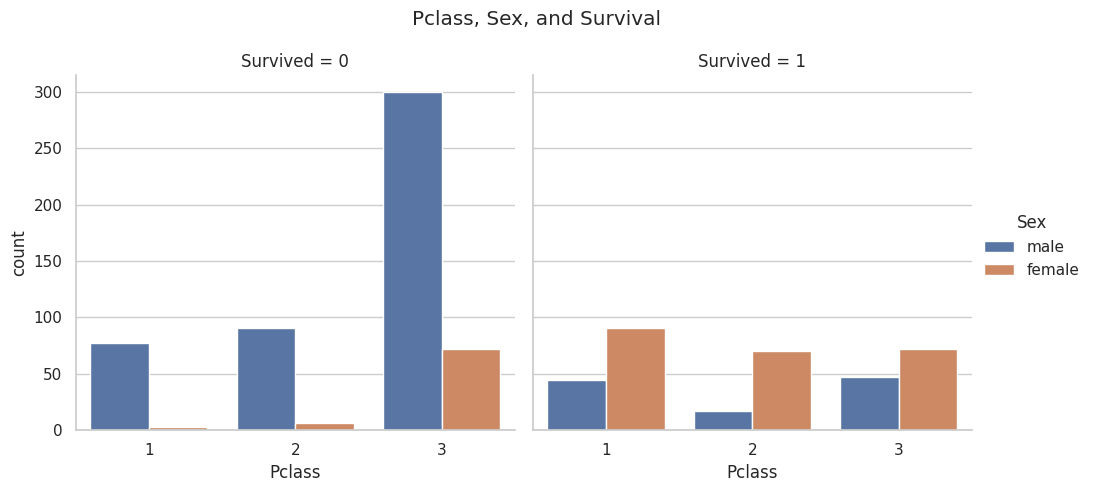

In [15]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle("Pclass, Sex, and Survival")
plt.show()

Age, Fare, and Survival

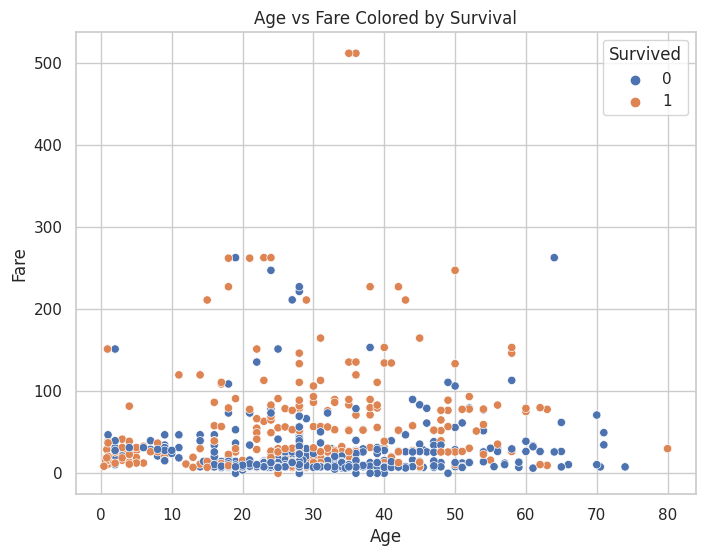

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare Colored by Survival")
plt.show()

# 8. Outlier Detection and Handling
Age Outliers

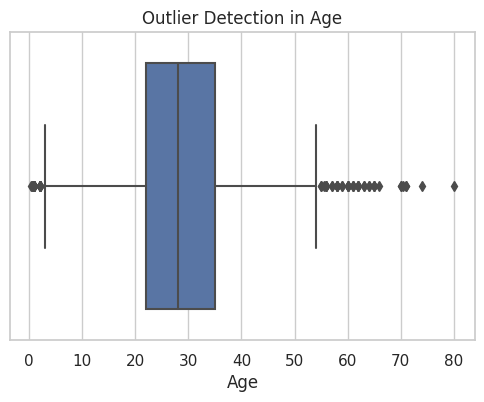

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Outlier Detection in Age")
plt.show()

Fare Outliers

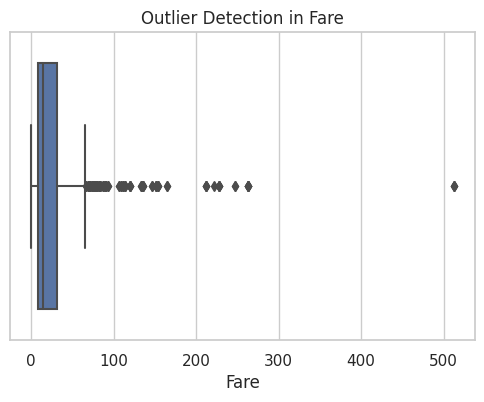

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Outlier Detection in Fare")
plt.show()

In [19]:
# Cap extreme fares at 99th percentile
fare_cap = df['Fare'].quantile(0.99)
df['Fare'] = np.where(df['Fare'] > fare_cap, fare_cap, df['Fare'])

# 9. Target Variable (Survived) Analysis

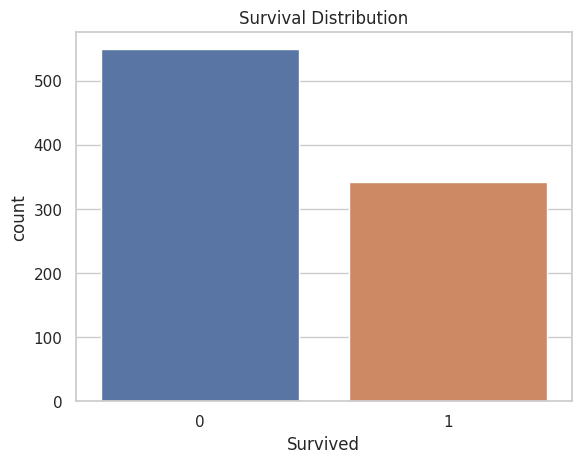

In [20]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

In [21]:
# Survival rate percentage
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print("Survival Rate (%):\n", survival_rate)

Survival Rate (%):
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


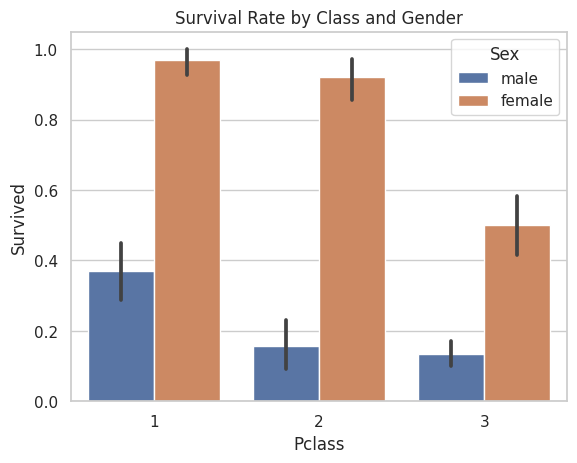

In [22]:
# Combined factors
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Class and Gender")
plt.show()